In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


16:40:35 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=976712;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=867402;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=45295;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=26041;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

16:40:37 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=39227;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=677327;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

16:40:39 INFO      Starting 3ML!                                                                     ]8;id=597217;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=864639;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=519165;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=943832;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=21607;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=410200;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=614546;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=726754;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

16:40:42 WARNING   Multinest minimizer not available                                           ]8;id=495478;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=117355;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

16:40:43 WARNING   PyGMO is not available                                                      ]8;id=45883;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=329599;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

16:40:43 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=836188;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=701622;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

16:40:44 WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=676578;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=708544;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=692968;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=15561;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

16:40:46 WARNING   No fermitools installed                                              ]8;id=698992;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=223569;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Yourlib init successful!!!


In [ ]:
# you can do some change about the lib and reload it any time.
reload(my)


WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



16:43:47 INFO      Creating singleton for                                                            ]8;id=701871;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=292407;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#41\41]8;;\
                  /home/lhaaso/caowy/Public/3MLWCDAv0.9/Standard/src/../../data/DR_ihep_MK2.root                   

16:43:53 INFO      Region of Interest:                                                                   ]8;id=138320;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=865600;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=333895;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=10661;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixConeROI: Center (R.A., Dec) = (42.380, 60.370), data radius =      ]8;id=949368;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py\healpix_cone_roi.py]8;;\:]8;id=142115;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py#87\87]8;;\
                  6.000 deg, model radius: 8.000 deg                                                               

         INFO                                                                                            ]8;id=870171;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=421151;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=875216;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=602066;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=323966;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=533975;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 96 x 96 px                                                            ]8;id=906937;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=998294;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=881992;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=712457;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=359716;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=390366;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=999052;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=292142;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=504082;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=681237;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=772769;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=475939;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /home/lhaaso/caowy/Public/3MLWCDAv0.9/Standard/src/../../data/DR_ihep_MK2.root                   

         INFO      Number of dec bins: 110                                                          ]8;id=758646;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=861974;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=816528;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=622819;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=22957;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=804915;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=254094;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=828474;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=915695;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=210631;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,7990634.0,7.983237e+06,1.000927,34470,113.009578
1,1,1024,RING,4065381.0,4.064221e+06,1.000286,34470,113.009578
2,2,1024,RING,697289.0,6.958065e+05,1.002131,34470,113.009578
3,3,1024,RING,285287.0,2.835919e+05,1.005977,34470,113.009578
4,4,1024,RING,69821.0,6.967516e+04,1.002093,34470,113.009578
5,5,1024,RING,19287.0,1.920867e+04,1.004078,34470,113.009578


         INFO      This Map Tree contains 784.448 transits in the first bin                         ]8;id=170997;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=673626;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 3.31 Mb                                                         ]8;id=190376;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=189274;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=372767;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=147324;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=208371;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=778872;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=72748;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=134584;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=402700;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=795449;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

Error in <TTreeFormula::Compile>:  Bad numerical expression : "name"


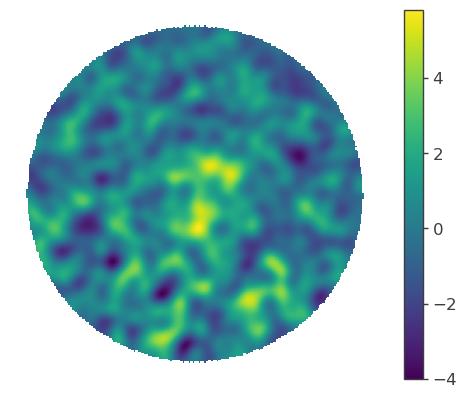

In [2]:
#####   Data Initialize

# maptree = "../../data/gcd_new.root"

maptree = "../../data/20210305_20230731_ihep_goodlist.root"
response = "../../data/DR_ihep_MK2.root"

region_name="J0248"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')
ra_J0248, dec_J0248 = 42.38, 60.37
ra_LSI61303,dec_LSI61303=40.14166666666666,61.25694444444444

ra1,dec1=ra_J0248, dec_J0248
ra2,dec2=ra_LSI61303,dec_LSI61303

data_radius = 6.0
model_radius = 8.0
roi=HealpixConeROI(ra=ra1,dec=dec1,data_radius=data_radius,model_radius=model_radius)  
WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.17)

#####   Data Situation
%matplotlib inline
WCDA.set_active_measurements(0, 5)
WCDA.display()

fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
fig.show()
fig.savefig(f"../res/{region_name}/counts_all.png",dpi=300)

In [4]:
Modelname="gaus+2pt+fixDGE"  # Name your model now to facilitate the creation of record folders by the program.
if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
    os.system(f'mkdir ../res/{region_name}/{Modelname}/')


#Without extended parameter settings, it's a point source. When you set the corresponding extension, it becomes the respective source.
J0248 = my.setsorce("J0248",ra1,dec1,sigma=0.8, #sf=True,raf=True,decf=True,
                indexb=(-4,-1),kb=(1e-14, 1e-12),pf=True,#indexf=True,
                fitrange=1,sb=(0,3))

# J0248 = my.setsorce("J0248",ra1,dec1, #raf=True,decf=True,
#                 indexb=(-4,-1),kb=(1e-14, 1e-12),pf=True,#indexf=True,
#                 fitrange=1.5,
#                 rdiff0=0.9, rdiff0b=(0.3,5), delta=1./3., deltaf=True, deltab=(0.1,1.1), uratio = 1.12, uratiof=True, #rdiff0f=True,
#                 spat="Diffusion")

# J0248 = setsorce("J0248",ra1,dec1, #raf=True,decf=True,
#                 indexb=(-4,-1),kb=(1e-14, 1e-12),pf=True,#indexf=True,
#                 fitrange=2.5,
#                 rdiff0=0.9, rdiff0b=(0.3,5), delta=1./3., deltaf=True, deltab=(0.1,1.1), #uratio = 1.12, uratiof=True, #, rdiff0f=True
#                 b=3, bb=(0.01,10), bf=True, incl=0, inclf=False, inclb=(-90,0), elongation=10, elongationf=True, elongationb=(0.1,200),
#                 spat="Diffusion")

LSI61303 = my.setsorce("LSI61303",ra2,dec2, #raf=True,decf=True,
                indexb=(-4,-1),pf=True, kb=(1e-15, 1e-12),#indexf=True,
                )
pt2 = my.setsorce("pt2",38.85,56.59, #raf=True,decf=True,
                indexb=(-4,-1),pf=True, kb=(1e-15, 1e-12),#indexf=True,
                )

Diffuse = my.set_diffusebkg(
                K = 3.3e-13, index = -2.3,
                # Kf=False, indexf=False
                )

lm = Model(J0248, LSI61303, pt2, Diffuse) #,Diffuse , pt1, pt2, pt3

with open(f'../res/{region_name}/{Modelname}/Model_init.txt', 'w') as f:
    for key, value in lm.parameters.items():
        f.write(f'{key}: {value}\n')

lm.display(complete=True)

Model summary:
==============

                  N
Point sources     2
Extended sources  2
Particle sources  0

Free parameters (13):
--------------------

                                           value min_value max_value  \
J0248.Gaussian_on_sphere.lon0              42.38     41.38     43.38   
J0248.Gaussian_on_sphere.lat0              60.37     59.37     61.37   
J0248.Gaussian_on_sphere.sigma               0.8       0.0       3.0   
J0248.spectrum.main.Powerlaw.K               0.0       0.0       0.0   
J0248.spectrum.main.Powerlaw.index          -2.6      -4.0      -1.0   
LSI61303.position.ra                   40.141667       0.0     360.0   
LSI61303.position.dec                  61.256944     -90.0      90.0   
LSI61303.spectrum.main.Powerlaw.K            0.0       0.0       0.0   
LSI61303.spectrum.main.Powerlaw.index       -2.6      -4.0      -1.0   
pt2.position.ra                            38.85       0.0     360.0   
pt2.position.dec                           56.59     -90.0      90.0   
pt2.spectrum.main.Powerlaw.K                 0.0       0.0       0.0   
pt2.spectrum.main.Powerlaw.index            -2.6      -4.0      -1.0   

                                                 unit  
J0248.Gaussian_on_sphere.lon0                     deg  
J0248.Gaussian_on_sphere.lat0                     deg  
J0248.Gaussian_on_sphere.sigma                    deg  
J0248.spectrum.main.Powerlaw.K         keV-1 s-1 cm-2  
J0248.spectrum.main.Powerlaw.index                     
LSI61303.position.ra                              deg  
LSI61303.position.dec                             deg  
LSI61303.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
LSI61303.spectrum.main.Powerlaw.index                  
pt2.position.ra                                   deg  
pt2.position.dec                                  deg  
pt2.spectrum.main.Powerlaw.K           keV-1 s-1 cm-2  
pt2.spectrum.main.Powerlaw.index                       

Fixed parameters (9):
---------------------

                                                                                  value  \
J0248.spectrum.main.Powerlaw.piv                                           3000000000.0   
LSI61303.spectrum.main.Powerlaw.piv                                        3000000000.0   
pt2.spectrum.main.Powerlaw.piv                                             3000000000.0   
Diffuse.SpatialTemplate_2D.K                                                        1.0   
Diffuse.SpatialTemplate_2D.hash       6997901705261540934763183943502934393086676068...   
Diffuse.SpatialTemplate_2D.ihdu                                                     0.0   
Diffuse.spectrum.main.Powerlaw.K                                                    0.0   
Diffuse.spectrum.main.Powerlaw.piv                                         3000000000.0   
Diffuse.spectrum.main.Powerlaw.index                                               -2.3   

                                     min_value max_value            unit  
J0248.spectrum.main.Powerlaw.piv          None      None             keV  
LSI61303.spectrum.main.Powerlaw.piv       None      None             keV  
pt2.spectrum.main.Powerlaw.piv            None      None             keV  
Diffuse.SpatialTemplate_2D.K              None      None           deg-2  
Diffuse.SpatialTemplate_2D.hash           None      None                  
Diffuse.SpatialTemplate_2D.ihdu            0.0      None                  
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0  keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.piv        None      None             keV  
Diffuse.spectrum.main.Powerlaw.index      -4.0      -1.0                  

Properties (2):
--------------------

                                                                        value  \
Diffuse.SpatialTemplate_2D.fits_file  ../../data/J0248_dust_bkg_template.fits   
Diffuse.SpatialTemplate_2D.frame                                         icrs   

                                                            a

16:44:20 INFO      Considering 15 dec bins for extended source J0248                ]8;id=793058;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=478011;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.370                       ]8;id=236586;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=342703;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=689680;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=675860;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=12603;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=415632;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=82085;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=708948;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=235276;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=968829;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

17:05:57 ERROR     Current minimum stored after fit (47844.104184552576) and current        ]8;id=564577;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=432426;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#365\365]8;;\
                  (47844.10711300322) do not correspond!                                                           

Best fit values:

,result,unit
parameter,,
J0248.Gaussian_on_sphere.lon0,(4.222 +/- 0.013) x 10,deg
J0248.Gaussian_on_sphere.lat0,(6.026 +/- 0.013) x 10,deg
J0248.Gaussian_on_sphere.sigma,(4.4 +/- 0.6) x 10^-1,deg
J0248.spectrum.main.Powerlaw.K,(9.3 -1.0 +1.2) x 10^-23,1 / (cm2 keV s)
J0248.spectrum.main.Powerlaw.index,-2.45 +/- 0.06,
LSI61303.position.ra,(4.0358 +/- 0.0033) x 10,deg
LSI61303.position.dec,(6.1216 +/- 0.0006) x 10,deg
LSI61303.spectrum.main.Powerlaw.K,(5.93 +/- 0.10) x 10^-23,1 / (cm2 keV s)
LSI61303.spectrum.main.Powerlaw.index,-2.861 +/- 0.012,


Correlation matrix:

1.00,0.09,-0.24,-0.46,0.24,0.03,-0.01,0.02,0.01,0.00,-0.00,-0.00,-0.00
0.09,1.00,-0.50,-0.72,0.32,-0.01,0.00,-0.01,-0.01,-0.00,0.00,0.00,0.00
-0.24,-0.50,1.00,0.27,0.40,0.04,0.00,-0.01,-0.01,0.00,0.00,-0.00,0.00
-0.46,-0.72,0.27,1.00,-0.17,0.08,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
0.24,0.32,0.40,-0.17,1.00,-0.06,0.00,-0.01,-0.01,-0.00,0.00,0.00,0.00
0.03,-0.01,0.04,0.08,-0.06,1.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
-0.01,0.00,0.00,0.00,0.00,-0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
0.02,-0.01,-0.01,-0.00,-0.01,-0.00,-0.00,1.00,-0.04,0.00,-0.00,-0.00,-0.00
0.01,-0.01,-0.01,0.00,-0.01,0.00,-0.00,-0.04,1.00,-0.00,-0.00,-0.00,-0.00
0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,1.00,0.00,-0.00,-0.00
-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,47844.107113
total,47844.107113


Values of statistical measures:

,statistical measures
AIC,95714.215986
BIC,95847.329080


Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

,value,negative_error,positive_error,error,unit
J0248.Gaussian_on_sphere.lon0,4.221710e+01,-1.310783e-01,1.254579e-01,1.282681e-01,deg
J0248.Gaussian_on_sphere.lat0,6.025800e+01,-1.320153e-01,1.335966e-01,1.328059e-01,deg
J0248.Gaussian_on_sphere.sigma,4.395965e-01,-6.120203e-02,6.065887e-02,6.093045e-02,deg
J0248.spectrum.main.Powerlaw.K,9.317692e-23,-1.011799e-23,1.171240e-23,1.091519e-23,1 / (cm2 keV s)
J0248.spectrum.main.Powerlaw.index,-2.445824e+00,-6.349173e-02,6.271392e-02,6.310282e-02,
LSI61303.position.ra,4.035765e+01,-3.301281e-02,3.289595e-02,3.295438e-02,deg
LSI61303.position.dec,6.121627e+01,-5.377671e-03,5.449447e-03,5.413559e-03,deg
LSI61303.spectrum.main.Powerlaw.K,5.933739e-23,-9.869646e-25,9.869741e-25,9.869694e-25,1 / (cm2 keV s)
LSI61303.spectrum.main.Powerlaw.index,-2.861223e+00,-1.238018e-02,1.149354e-02,1.193686e-02,
pt2.position.ra,3.847369e+01,-1.124835e-02,1.111613e-02,1.118224e-02,deg


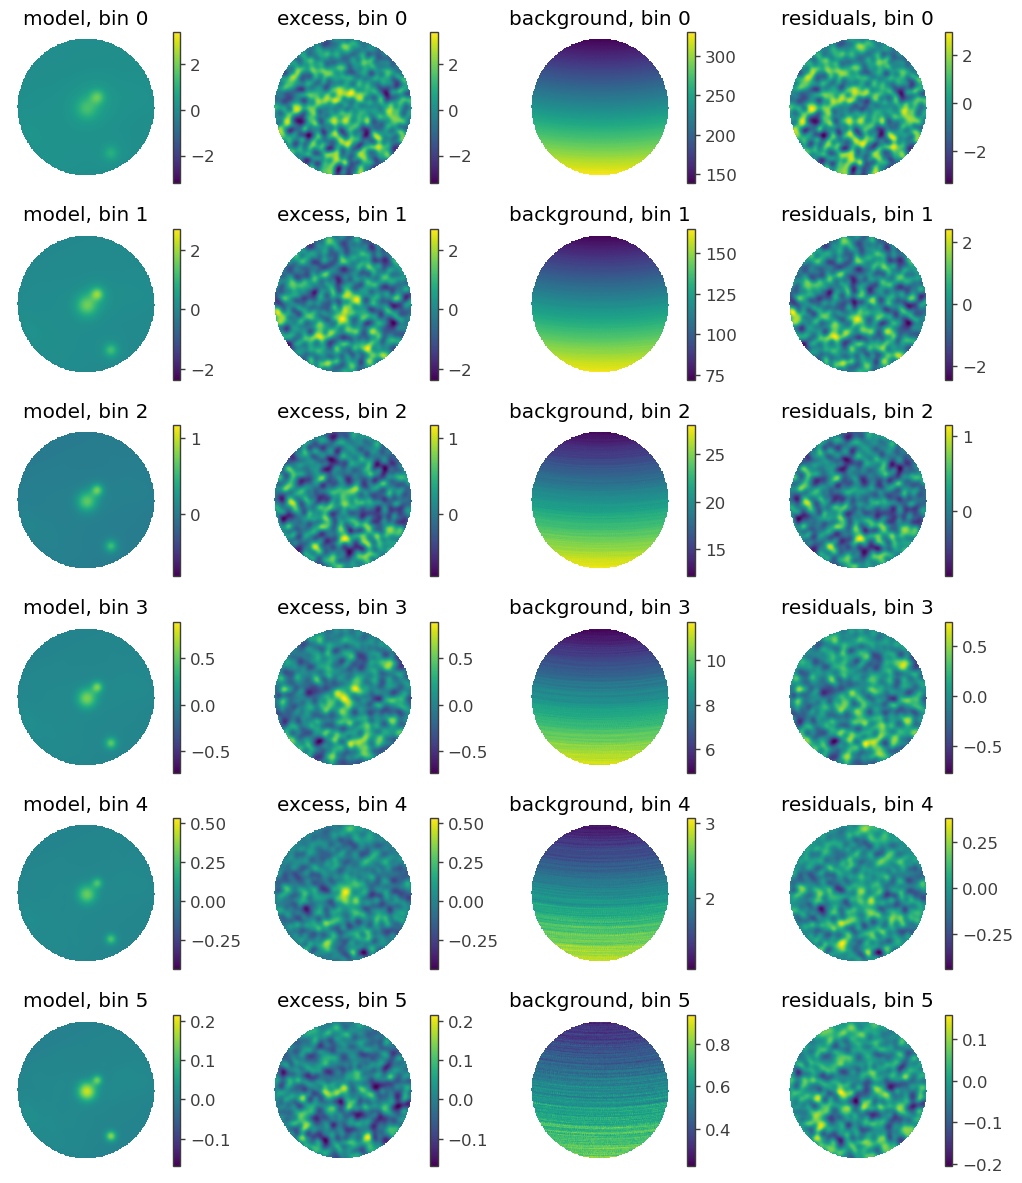

In [5]:
# Attempt the fitting; it will take approximately ten minutes.
result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, mini="ROOT")
sources = my.get_sources(lm,result)
result[1][0]
# result[0].get_contours(J0248.Gaussian_on_sphere.lon0,39.88,44.88,30)

In [6]:
# Compute Ts,  it will take approximately five minutes.
TSlist = ["J0248", "LSI61303", "pt2"] # A list put the source that you want to compute TS
TS = {}
for sc in tqdm(TSlist):
    TS[sc]=result[0].compute_TS(sc,result[1][1]).values[0][2]
llh = WCDA.get_log_like()
TS_all = WCDA.cal_TS_all()
TS["TS_all"] = TS_all
TS["-log(likelihood)"] = -llh
TSresults = pd.DataFrame([TS])
TSresults.to_csv(f'../res/{region_name}/{Modelname}/Results.txt', sep='\t', mode='a', index=False)
TSresults

17:09:11 INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=465478;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=551507;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=225217;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=991588;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=112884;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=864754;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=471872;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=751807;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

17:10:37 INFO      Considering 15 dec bins for extended source J0248                ]8;id=30200;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=21731;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=434653;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=589701;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=233701;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=272047;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=643276;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=317050;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

17:10:38 INFO      Considering 15 dec bins for extended source J0248                ]8;id=152360;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=756979;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=755228;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=307322;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=755888;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=679534;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=745376;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=890433;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=164983;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=357972;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=227678;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=111674;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

17:11:36 INFO      Considering 15 dec bins for extended source J0248                ]8;id=146494;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=582664;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=315944;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=995288;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=886224;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=924762;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=669697;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=526982;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 15 dec bins for extended source J0248                ]8;id=491469;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=597025;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

17:11:37 INFO      Central bin is bin at Declination = 60.258                       ]8;id=904495;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=869278;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=60450;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=922345;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=898135;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=54977;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=227146;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=169817;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=649331;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=889023;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

17:13:12 INFO      Considering 15 dec bins for extended source J0248                ]8;id=968836;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=372233;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=713822;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=396923;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=894527;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=568138;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=669102;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=265092;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

100%|██████████| 3/3 [04:01<00:00, 80.59s/it]


,J0248,LSI61303,pt2,TS_all,-log(likelihood)
0,63.077665,28.253715,23.544625,144.183998,47844.107113


40.14166666666666 61.25694444444444 LS I +61 303
33.98595833333333 62.30927777777777 J0215+6218
40.645833333333336 62.947222222222216 J0242+62
40.75 60.45 J0243+6027
42.07758333333333 60.35963888888889 J0248+6021
34.41666666666666 62.75 G132.7+01.3


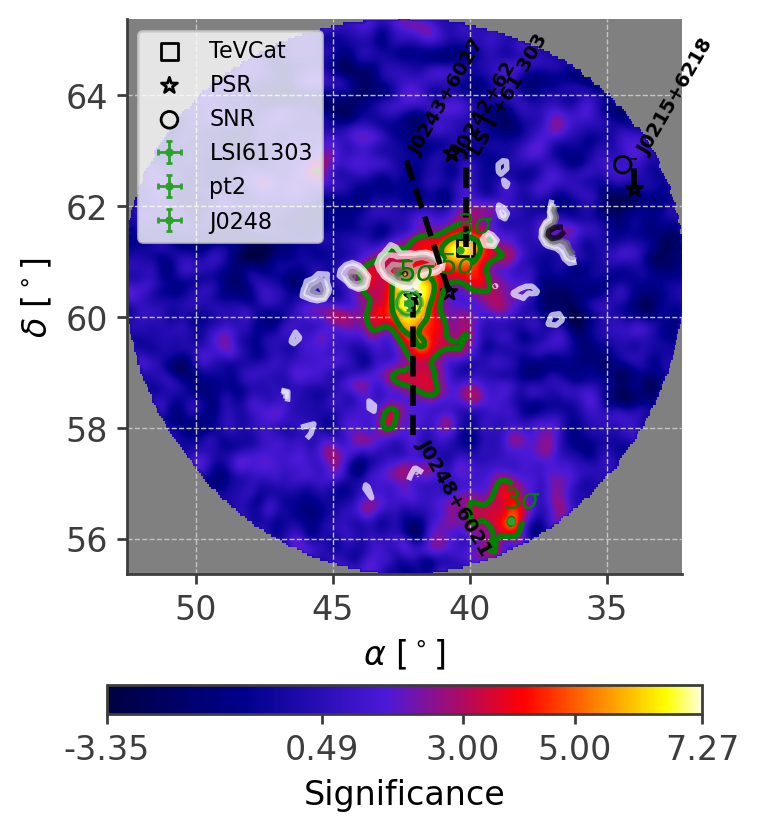

In [7]:
%matplotlib inline
sources = my.get_sources(lm,result)

sources.pop("Diffuse")
# map2, skymapHeader = hp.read_map("../../data/signif_gcd_new_nHit006_0.30.fits.gz_other.fits.gz",h=True)
# map2, skymapHeader = hp.read_map("../../data/sigts_J0248.fits.gz",h=True)
map2, skymapHeader = hp.read_map("../../data/sigts_siglist_J0248_20210305-20230731.fits.gz",h=True)
# map2, skymapHeader = hp.read_map("../../data/signif_20210305_20230731_ihep_goodlist_nHit006_0.29.fits.gz.fits.gz",h=True)

radx= 20; rady = 20
ymax = dec1+rady/2
ymin = dec1-rady/2
xmin = ra1-radx/2
xmax = ra1+radx/2
# ra1, dec1 = 83.63,22.02
ra1, dec1 =42.38, 60.37
map2 = hp.ma(map2)
fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=10, contours=[3,5],save=True)
# my.Drawcat(xmin,xmax,ymin,ymax,"4FGL","^","black",60,label="4FGL",textlabel=True)
# my.Drawcat(xmin,xmax,ymin,ymax,"QSO",">","black",60,label="QSO",textlabel=True)
# my.Drawcat(xmin,xmax,ymin,ymax,"Simbad",".","black",90,fontsize=3,label="AGN",stype="AGN",textlabel=False)
plt.legend()

In [8]:
smoothsigma=[0.4123, 0.3111, 0.2476, 0.2064, 0.1633, 0.1379, 0.2896, 0.2594, 0.2152, 0.189, 0.1561, 0.14]
maps = my.getmap(WCDA,roi,"J0248",modelindex=[2,2],
                #    stack=[1.000927,1.000286,1.002131,1.005977,1.002093,1.004078],
                   stack=[0, 0, 1.002131,1.005977,1.002093,1.004078],
                   smoothsigma=smoothsigma
                   )
smapall = my.smoothmap(maps[-1], smooth_sigma=0.2896)

100%|██████████| 34470/34470 [00:00<00:00, 86140.94it/s]


Mask all


100%|██████████| 34470/34470 [00:00<00:00, 49789.35it/s]


Mask all


100%|██████████| 34470/34470 [00:00<00:00, 52004.28it/s]


Mask all


100%|██████████| 34470/34470 [00:00<00:00, 44598.45it/s]


Mask all


100%|██████████| 34470/34470 [00:00<00:00, 36615.80it/s]


Mask all


100%|██████████| 34470/34470 [00:00<00:00, 50068.80it/s]


Mask all


100%|██████████| 34470/34470 [00:00<00:00, 325823.49it/s]


Smooth Sig
Smooth bkg
Smooth Modelbkg
Mask all


100%|██████████| 5/5 [00:00<00:00,  5.55it/s]


************************
[ 8.59629839e+02 -1.65104201e-01  1.06785017e+00]
************************
max Significance= 3.2
31.379166666666666 64.85 3C 58
40.14166666666666 61.25694444444444 LS I +61 303
31.408 64.82813888888889 J0205+6449
33.98595833333333 62.30927777777777 J0215+6218
40.645833333333336 62.947222222222216 J0242+62
40.75 60.45 J0243+6027
42.07758333333333 60.35963888888889 J0248+6021
53.24737499999999 54.57877777777778 J0332+5434
31.42083333333333 64.81666666666666 G130.7+03.1
34.41666666666666 62.75 G132.7+01.3


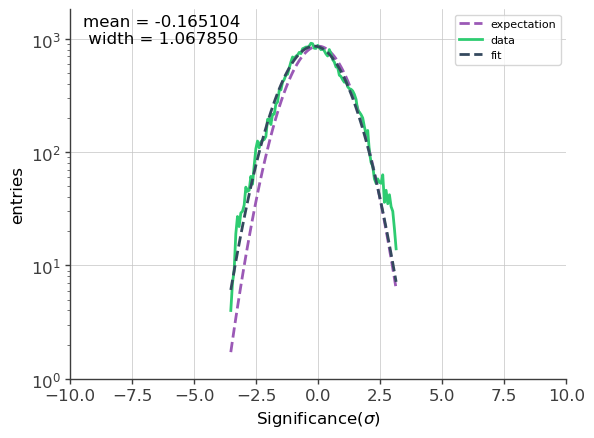

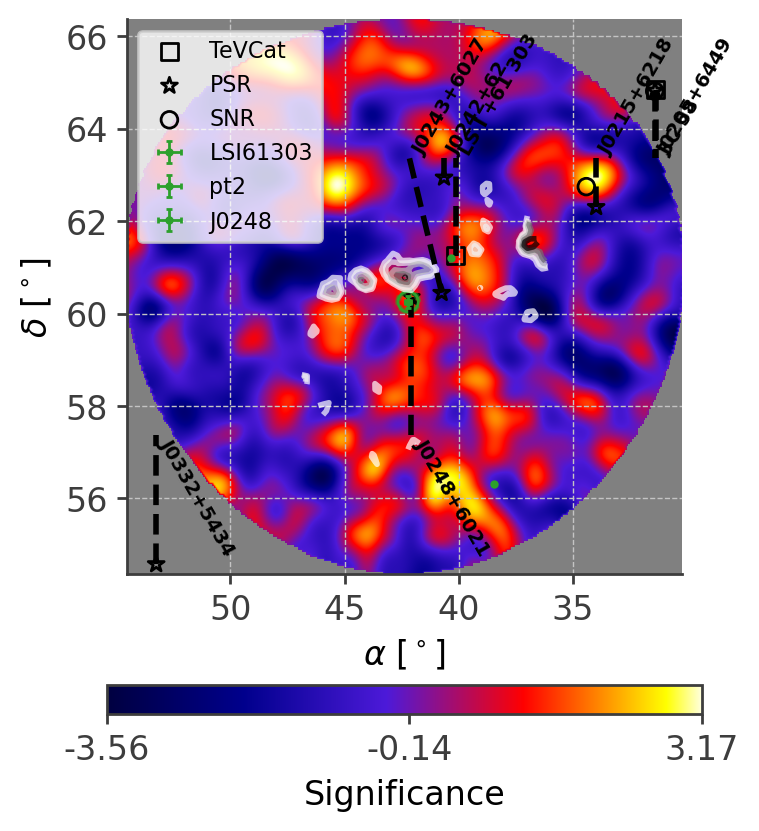

In [10]:
%matplotlib inline
res=True
saven = "Significance"
if res:
    saven+="_res"
sigmap = my.getsigmap(region_name, Modelname, [smapall],i=0,signif=17,res=res,name="J0248")
fig = my.drawmap(region_name, Modelname, sources, sigmap, ra1, dec1, rad=12, contours=[100],save=True,savename=saven)

In [11]:
my.write_resmap(region_name, Modelname, WCDA, roi, maptree, ra1, dec1, "J0248resall_DGE_cdiff",[0,0],[0,0])

processing at nHit0 0


100%|██████████| 95589/95589 [00:04<00:00, 20130.18it/s]


processing at nHit0 1


100%|██████████| 95589/95589 [00:05<00:00, 16804.35it/s]


processing at nHit0 2


100%|██████████| 95589/95589 [00:06<00:00, 15061.84it/s]


processing at nHit0 3


100%|██████████| 95589/95589 [00:05<00:00, 17827.81it/s]


processing at nHit0 4


100%|██████████| 95589/95589 [00:05<00:00, 18211.75it/s]


processing at nHit0 5


100%|██████████| 95589/95589 [00:05<00:00, 18326.32it/s]


In [13]:
Flux_WCDA = my.getdatapoint(WCDA, lm, maptree, response, roi, "J0248")
Flux_WCDA2 = my.getdatapoint(WCDA, lm, maptree, response, roi, "LSI61303")
Flux_WCDA3 = my.getdatapoint(WCDA, lm, maptree, response, roi, "pt2")
# Flux_WCDA4 = my.getdatapoint(WCDA, lm, maptree, response, roi, "Diffuse")


WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:14 INFO      Considering 15 dec bins for extended source J0248                ]8;id=394691;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=473226;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=666339;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=180557;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=391736;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=964081;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=199445;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=20160;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=584176;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=303586;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=595281;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=139840;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J0248.spectrum.main.Powerlaw.K,(4.0 -2.8 +10) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8577.041542
total,8577.041542


Values of statistical measures:

,statistical measures
AIC,17156.083103
BIC,17166.322688



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:17 INFO      Considering 15 dec bins for extended source J0248                ]8;id=617491;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=127271;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=366858;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=100587;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=709384;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=206664;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=306019;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=749138;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=689383;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=629091;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=287015;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=309548;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J0248.spectrum.main.Powerlaw.K,(6.4 -2.5 +4) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8467.079788
total,8467.079788


Values of statistical measures:

,statistical measures
AIC,16936.159595
BIC,16946.399180



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:19 INFO      Considering 15 dec bins for extended source J0248                ]8;id=863654;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=195430;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=974649;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=101254;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=624475;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=246842;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=651736;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=546132;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=616649;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=867023;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=711587;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=729887;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J0248.spectrum.main.Powerlaw.K,(1.05 -0.29 +0.4) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8141.995715
total,8141.995715


Values of statistical measures:

,statistical measures
AIC,16285.991448
BIC,16296.231033



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:20 INFO      Considering 15 dec bins for extended source J0248                ]8;id=989144;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=875203;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=524001;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=360083;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=4148;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=771180;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=527484;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=383882;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=703289;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=467994;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=484557;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=500977;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J0248.spectrum.main.Powerlaw.K,(1.21 -0.24 +0.29) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8197.270504
total,8197.270504


Values of statistical measures:

,statistical measures
AIC,16396.541027
BIC,16406.780612



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:22 INFO      Considering 15 dec bins for extended source J0248                ]8;id=910020;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=28289;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=537076;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=207958;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=935632;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=749425;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=764542;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=732906;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=526139;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=978265;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=530687;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=54242;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J0248.spectrum.main.Powerlaw.K,(1.43 -0.24 +0.29) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,7460.693846
total,7460.693846


Values of statistical measures:

,statistical measures
AIC,14923.387711
BIC,14933.627296



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:25 INFO      Considering 15 dec bins for extended source J0248                ]8;id=168978;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=252516;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=619431;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=59828;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=873998;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=56013;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=710311;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=218821;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=546130;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=695568;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=565629;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=795561;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J0248.spectrum.main.Powerlaw.K,(5.0 -1.8 +2.8) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,6994.695521
total,6994.695521


Values of statistical measures:

,statistical measures
AIC,13991.391062
BIC,14001.630646



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:27 INFO      Considering 15 dec bins for extended source J0248                ]8;id=891038;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=86182;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=467981;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=87758;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=200684;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=968033;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=293360;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=292384;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=47277;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=422400;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=516775;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=634759;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
LSI61303.spectrum.main.Powerlaw.K,(5.6 -2.4 +4) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8577.650139
total,8577.650139


Values of statistical measures:

,statistical measures
AIC,17157.300297
BIC,17167.539882



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:29 INFO      Considering 15 dec bins for extended source J0248                ]8;id=330422;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=29803;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=337911;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=988521;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=761128;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=746289;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=776890;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=989914;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=660949;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=875173;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=310151;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=663517;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
LSI61303.spectrum.main.Powerlaw.K,(3.2 -1.6 +3.4) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8466.744594
total,8466.744594


Values of statistical measures:

,statistical measures
AIC,16935.489208
BIC,16945.728792



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:31 INFO      Considering 15 dec bins for extended source J0248                ]8;id=186433;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=593991;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=107897;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=48849;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=390004;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=638469;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=392158;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=327228;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=526368;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=271150;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=626217;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=600952;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
LSI61303.spectrum.main.Powerlaw.K,(7.8 -2.2 +3.0) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8141.79102
total,8141.79102


Values of statistical measures:

,statistical measures
AIC,16285.582059
BIC,16295.821644



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:33 INFO      Considering 15 dec bins for extended source J0248                ]8;id=593251;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=679300;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=495006;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=168119;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=668702;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=67277;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=68731;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=988110;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=909024;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=64041;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=435921;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=759968;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
LSI61303.spectrum.main.Powerlaw.K,(9.1 -1.9 +2.5) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8196.748652
total,8196.748652


Values of statistical measures:

,statistical measures
AIC,16395.497324
BIC,16405.736908



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:35 INFO      Considering 15 dec bins for extended source J0248                ]8;id=471898;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=20170;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=973561;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=156877;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=323627;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=204277;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=948783;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=935304;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=214337;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=480385;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=956304;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=819235;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
LSI61303.spectrum.main.Powerlaw.K,(5.6 -1.9 +2.9) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,7462.570523
total,7462.570523


Values of statistical measures:

,statistical measures
AIC,14927.141064
BIC,14937.380649



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:37 INFO      Considering 15 dec bins for extended source J0248                ]8;id=471866;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=655560;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=798450;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=459343;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=906695;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=693728;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=791789;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=104465;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=194293;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=990048;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=972036;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=40964;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
LSI61303.spectrum.main.Powerlaw.K,(3.5 -1.8 +4) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,6996.06011
total,6996.06011


Values of statistical measures:

,statistical measures
AIC,13994.120239
BIC,14004.359824



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:39 INFO      Considering 15 dec bins for extended source J0248                ]8;id=259939;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=140853;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=876202;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=353888;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=559728;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=705666;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=691996;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=188375;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=376196;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=463784;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=384236;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=344142;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
pt2.spectrum.main.Powerlaw.K,(2.7 -1.8 +5) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8577.653661
total,8577.653661


Values of statistical measures:

,statistical measures
AIC,17157.307341
BIC,17167.546925



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:41 INFO      Considering 15 dec bins for extended source J0248                ]8;id=320964;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=218827;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=381524;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=405062;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=369593;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=643996;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=801691;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=623036;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=823875;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=939601;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=980287;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=613360;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
pt2.spectrum.main.Powerlaw.K,(3.9 -1.4 +2.3) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8467.22926
total,8467.22926


Values of statistical measures:

,statistical measures
AIC,16936.458539
BIC,16946.698123



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:43 INFO      Considering 15 dec bins for extended source J0248                ]8;id=377784;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=266089;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=924266;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=587763;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=435652;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=515217;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=413650;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=594235;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=7390;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=975504;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=682014;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=174485;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
pt2.spectrum.main.Powerlaw.K,(3.1 -1.2 +2.1) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8142.010286
total,8142.010286


Values of statistical measures:

,statistical measures
AIC,16286.020591
BIC,16296.260176



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:45 INFO      Considering 15 dec bins for extended source J0248                ]8;id=215387;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=736860;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=308018;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=452424;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=340899;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=912216;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=335619;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=528411;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=735482;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=378045;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=43090;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=614540;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
pt2.spectrum.main.Powerlaw.K,(1.1 -0.7 +2.0) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8197.078909
total,8197.078909


Values of statistical measures:

,statistical measures
AIC,16396.157836
BIC,16406.397421



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:48 INFO      Considering 15 dec bins for extended source J0248                ]8;id=204708;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=83138;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=822256;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=52378;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=657023;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=893399;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=482636;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=504075;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=10090;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=314351;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=543020;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=627746;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
pt2.spectrum.main.Powerlaw.K,(2.4 -0.9 +1.4) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,7462.574814
total,7462.574814


Values of statistical measures:

,statistical measures
AIC,14927.149647
BIC,14937.389232



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



17:28:50 INFO      Considering 15 dec bins for extended source J0248                ]8;id=46751;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=813257;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=943341;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=55597;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=586173;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=836787;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=731186;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=165064;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=902887;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=333279;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=497126;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=190788;file:///home/lhaaso/caowy/.mylib/miniconda/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
pt2.spectrum.main.Powerlaw.K,(3.1 -0.9 +1.3) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,6996.383782
total,6996.383782


Values of statistical measures:

,statistical measures
AIC,13994.767584
BIC,14005.007168


processing MLE analyses:   0%|          | 0/3 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

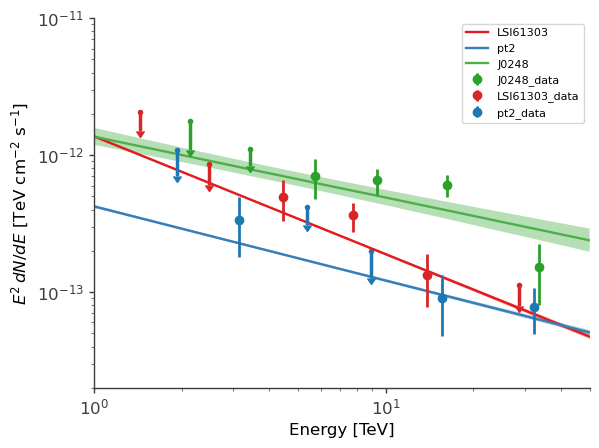

In [14]:
%matplotlib inline
x_Max=50.
x_Min=1
y_Min=0.2e-13
y_Max=1e-11
fig,ax = plt.subplots()
plot_spectra(
    result[0].results,
    sources_to_use=["J0248","LSI61303","pt2"],
    include_extended=True,
    ene_min=x_Min,
    ene_max=x_Max,
    num_ene=30,
    energy_unit="TeV",
    flux_unit="TeV/(s cm2)",
    subplot=ax
    )

my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA,"J0248_data","tab:green")
my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA2, "LSI61303_data", "tab:red")
my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA3, "pt2_data", "tab:blue")
# my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA4, "Diffuse_data", "tab:green")

# e_J0248=np.linspace(x_Min,x_Max,500)
# flux_J0248_sci=e_J0248**2*8.2e-14*pow(e_J0248/10,-2.9-0.19*np.log10(e_J0248/10))
# plt.plot(e_J0248,flux_J0248_sci,label='LHAASO Science')

# LHAASO_sensitivity = np.genfromtxt("./LHAASO_sensitivity.csv",delimiter=',')
# plt.plot(LHAASO_sensitivity[:,0],LHAASO_sensitivity[:,1]*1e-11,label="LHAASO 1yr", c="black")

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
plt.legend()
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')